Country Name        Brazil     Indonesia         India       Turkiye  \
2010          2.208838e+12  7.550942e+11  1.675616e+12  7.769673e+11   
2011          2.616156e+12  8.929691e+11  1.823052e+12  8.387853e+11   
2012          2.465228e+12  9.178699e+11  1.827638e+12  8.805559e+11   
2013          2.472820e+12  9.125241e+11  1.856722e+12  9.577991e+11   
2014          2.456044e+12  8.908148e+11  2.039126e+12  9.389346e+11   

Country Name  South Africa  
2010          4.173638e+11  
2011          4.581995e+11  
2012          4.344005e+11  
2013          4.008860e+11  
2014          3.811989e+11  


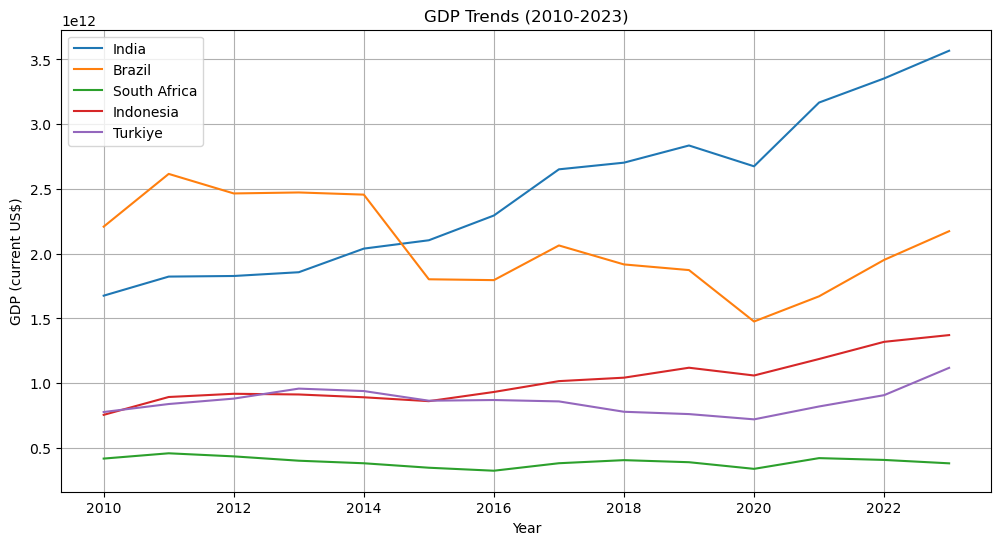


GDP Growth Rates (%):
Country Name     Brazil  Indonesia      India    Turkiye  South Africa
2019          -2.276849   7.371240   4.908623  -2.306397     -3.930974
2020         -21.202342  -5.365475  -5.669147  -5.343904    -13.190705
2021          13.179271  12.034773  18.409210  13.816662     24.532083
2022          16.836380  11.172819   5.878875  10.642385     -3.318439
2023          11.360162   3.949346   6.383869  23.275299     -6.443707

GDP Forecasts for 2024–2026 (current US$):
India: [3.54675525e+12 3.69038268e+12 3.83401012e+12]
Brazil: [1.66856350e+12 1.61539033e+12 1.56221716e+12]
South Africa: [3.69876951e+11 3.66957074e+11 3.64037197e+11]
Indonesia: [1.31483346e+12 1.35419406e+12 1.39355465e+12]
Turkiye: [8.93743255e+11 8.97751113e+11 9.01758971e+11]


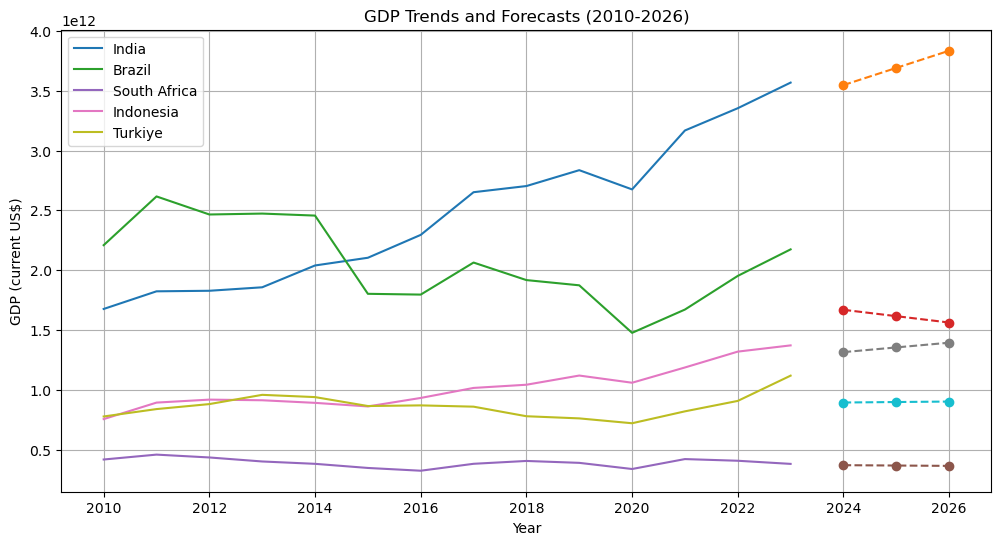

In [9]:
# Emerging Markets GDP Growth Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# 1. Load Data
# Assume you download 'gdp_data.csv' from World Bank for India, Brazil, South Africa, Indonesia, Turkey
data = pd.read_csv('/Users/rahulyadav/Desktop/GDP data.csv' ,skiprows=4)

# 2. Preprocess
# Clean up column names
data.columns = data.columns.str.strip()
countries = ['India', 'Brazil', 'South Africa', 'Indonesia', 'Turkiye']

# Filter years
years = [str(i) for i in range(2010, 2024)]
gdp_data = data[data['Country Name'].isin(countries)][['Country Name'] + years]
gdp_data.set_index('Country Name', inplace=True)

gdp_data = gdp_data.T  # Transpose
gdp_data.index = gdp_data.index.astype(int)

print(gdp_data.head())

# 3. Visualize
plt.figure(figsize=(12,6))
for country in countries:
    plt.plot(gdp_data.index, gdp_data[country], label=country)
plt.title('GDP Trends (2010-2023)')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.legend()
plt.grid(True)
plt.show()

# 4. Calculate Growth Rates
gdp_growth = gdp_data.pct_change() * 100
print("\nGDP Growth Rates (%):")
print(gdp_growth.tail())

# 5. Simple Forecast using Linear Regression
future_years = np.array([2024, 2025, 2026]).reshape(-1,1)

forecast = {}

for country in countries:
    X = gdp_data.index.values.reshape(-1,1)
    y = gdp_data[country].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(future_years)
    forecast[country] = y_pred

# Display Forecasts
print("\nGDP Forecasts for 2024–2026 (current US$):")
for country in countries:
    print(f"{country}: {forecast[country]}")

# 6. Visualize Forecasts
plt.figure(figsize=(12,6))
for country in countries:
    plt.plot(gdp_data.index, gdp_data[country], label=country)
    plt.plot([2024, 2025, 2026], forecast[country], linestyle='--', marker='o')
plt.title('GDP Trends and Forecasts (2010-2026)')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.legend()
plt.grid(True)
plt.show()
